In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datasets import load_dataset

In [2]:
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [51]:
# Identifying Column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [40]:
# Identifying columns with NaN values in them
df.columns[df.isna().any() == True]

Index(['job_title', 'job_location', 'job_via', 'job_schedule_type',
       'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg',
       'company_name', 'job_skills', 'job_type_skills'],
      dtype='object')

In [45]:
# Identifying rows with duplicate values
print('Number of duplicate records in the data :', len(df[df.duplicated()]))

Number of duplicate records in the data : 101


In [72]:
# Dropping duplicating rows
df_unique = df.drop_duplicates().copy()

print('Number of rows in original data :', len(df))
print('Number of unique rows           :',len(df_unique))
print('Duplicate rows                  :',len(df)-len(df_unique))

Number of rows in original data : 785741
Number of unique rows           : 785640
Duplicate rows                  : 101


In [70]:
# Null values in salary_year_avg column
print('Percentage of Null values in salary_year_avg column :',(df_unique['salary_year_avg'].isna().sum()/ len(df_unique['salary_year_avg'])) * 100)

Percentage of Null values in salary_year_avg column : 97.19948067817322


In [74]:
# Data cleaning
# Converting job_posted_date to datetime function 
df_unique['job_posted_date'] = pd.to_datetime(df_unique['job_posted_date'])

# Formatting the list inside the job_skills column
df_unique['job_skills'] = df_unique['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [89]:
# Job postings by title
df_plot = df_unique['job_title_short'].value_counts().to_frame()

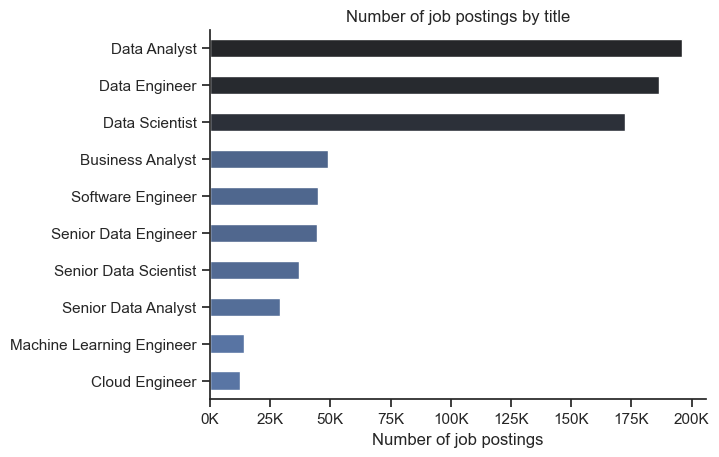

In [104]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:b_r', width=0.5)
sns.despine()
plt.xlabel('Number of job postings')
plt.ylabel('')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
plt.title('Number of job postings by title')
plt.legend().remove()
plt.show()

In [107]:
# Job postings of top 20 Countries
df_plot = df_unique['job_country'].value_counts().to_frame().head(20)

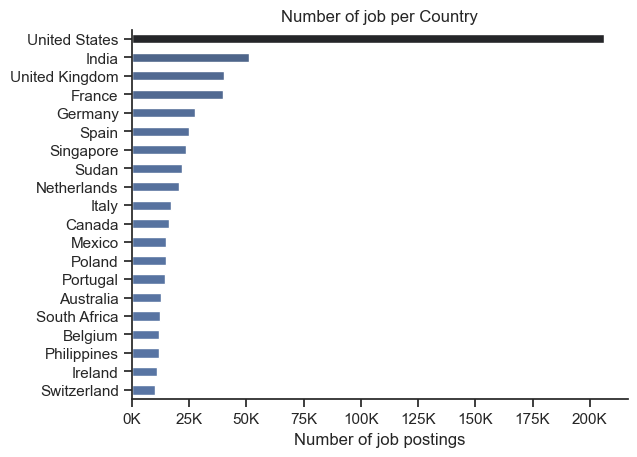

In [109]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='dark:b_r', width=0.5)
sns.despine()
plt.xlabel('Number of job postings')
plt.ylabel('')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
plt.title('Number of job per Country')
plt.legend().remove()
plt.show()

In [129]:
# Job postings of top 20 Companies
## It was observed the highest job_postings were by a company named 'Emprego' which didn't mention salary in any of their 6000+ postings.
## We thus ignore this company and select the dataframe from the second highest company
df_plot = df_unique['company_name'].value_counts().to_frame()[1:].head(20)


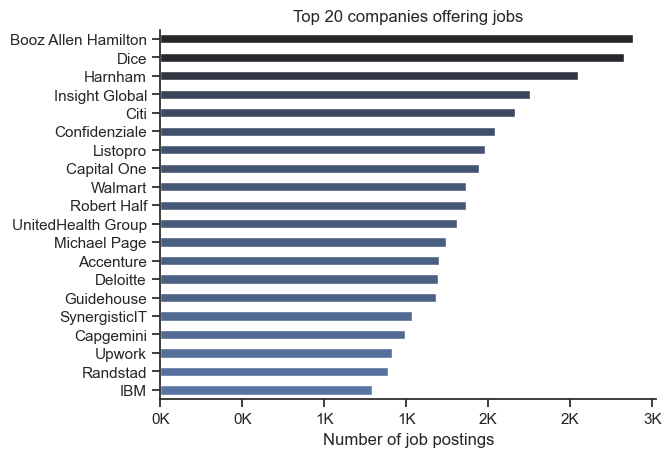

In [130]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', width=0.5)
sns.despine()
plt.xlabel('Number of job postings')
plt.ylabel('')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
plt.title('Top 20 companies offering jobs')
plt.legend().remove()
plt.show()

In [139]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

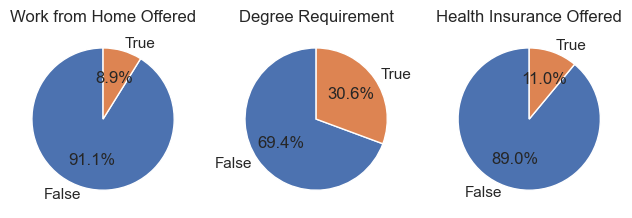

In [149]:
fig, ax = plt.subplots(1,len(dict_column.items()))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_unique[column].value_counts(), labels = ['False', 'True'], startangle =90, autopct='%1.1f%%')
    ax[i].set_title(title)
fig.tight_layout()
plt.show()

In [188]:
# Data analyst roles in United States
df_plot = df_unique[(df_unique['job_country'] == 'United States') & (df_unique['job_title_short'] == 'Data Analyst')]['job_location'].value_counts().to_frame().head(20)

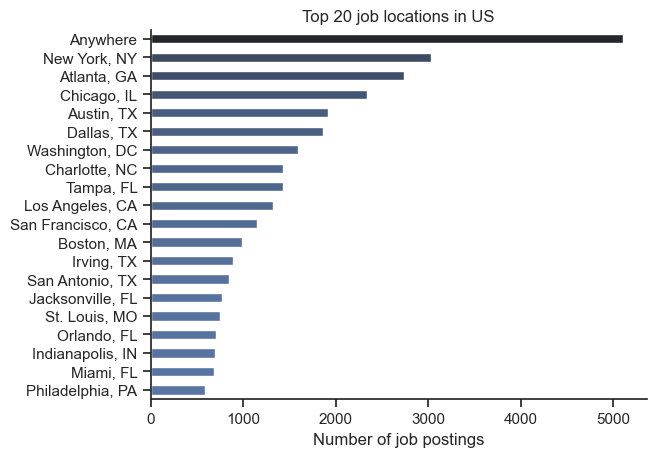

In [190]:
# Remove the portion after the comma in job_location
#df_plot.index = df_plot.index.str.split(',').str[0]

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', width=0.5)
sns.despine()
plt.xlabel('Number of job postings')
plt.ylabel('')
plt.title('Top 20 job locations in US')
plt.legend().remove()
plt.show()

In [193]:
# Top companies offering Data analyst jobs in US
df_plot = df_unique[(df_unique['job_country'] == 'United States') & (df_unique['job_title_short'] == 'Data Analyst')]['company_name'].value_counts().head(20).to_frame()

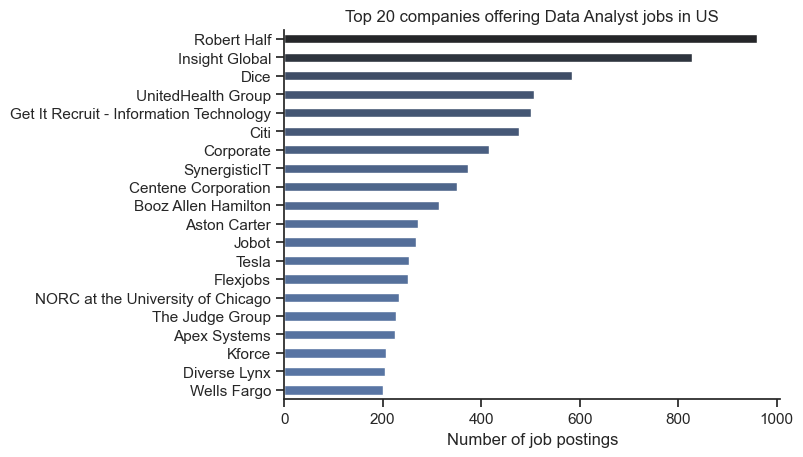

In [195]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', width=0.5)
sns.despine()
plt.xlabel('Number of job postings')
plt.ylabel('')
plt.title('Top 20 companies offering Data Analyst jobs in US')
plt.legend().remove()
plt.show()

In [196]:
# Benefit offering for Data analyst jobs in US
df_plot = df_unique[(df_unique['job_country'] == 'United States') & (df_unique['job_title_short'] == 'Data Analyst')]

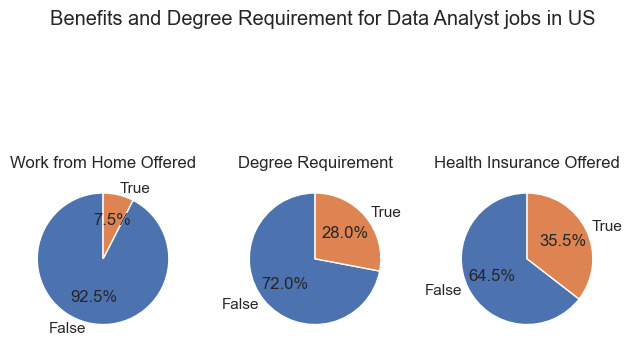

In [200]:

fig, ax = plt.subplots(1,len(dict_column.items()))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_plot[column].value_counts(), labels = ['False', 'True'], startangle =90, autopct='%1.1f%%')
    ax[i].set_title(title)

fig.suptitle('Benefits and Degree Requirement for Data Analyst jobs in US')
fig.tight_layout()
plt.show()